In [2]:
#Yufan Lin

In [89]:
import pandas as pd
import matplotlib.pyplot as plt

In [90]:
geo_df = pd.read_csv("C:/Users/dell/Desktop/cs506/eviction_with_geographic.csv",index_col=0)
print(geo_df.shape)

(318, 24)


In [91]:
geo_df['other'] = (geo_df['Estimate!!Total:!!Not Hispanic or Latino:!!Some other race alone'] + geo_df['Estimate!!Total:!!Not Hispanic or Latino:!!Two or more races:']- geo_df['Estimate!!Total:!!Not Hispanic or Latino:!!Two or more races:!!Two races including Some other race'])/geo_df['Estimate!!Total:'] * 100
geo_df['White'] = geo_df['Estimate!!Total:!!Not Hispanic or Latino:!!White alone']/geo_df['Estimate!!Total:'] * 100
geo_df['Black or African American'] = geo_df['Estimate!!Total:!!Not Hispanic or Latino:!!Black or African American alone']/geo_df['Estimate!!Total:'] * 100
geo_df['Asian'] = geo_df['Estimate!!Total:!!Not Hispanic or Latino:!!Asian alone']/geo_df['Estimate!!Total:'] * 100
geo_df['Native Hawaiian and Other Pacific Islander'] = geo_df['Estimate!!Total:!!Not Hispanic or Latino:!!Native Hawaiian and Other Pacific Islander alone']/geo_df['Estimate!!Total:'] * 100
geo_df['American Indian and Alaska Native'] = geo_df['Estimate!!Total:!!Not Hispanic or Latino:!!American Indian and Alaska Native alone']/geo_df['Estimate!!Total:'] * 100
geo_df['Hispanic or Latino'] = geo_df['Estimate!!Total:!!Hispanic or Latino:']/geo_df['Estimate!!Total:'] * 100
race_columns=['Muni', 'White', 'Black or African American', 'Asian', 'Native Hawaiian and Other Pacific Islander',
           'American Indian and Alaska Native', 'other', 'Hispanic or Latino']

In [92]:
education = pd.read_csv('C:/Users/dell/Desktop/cs506/2019_5Y_EducationalAttainment.csv',skiprows=1)
income = pd.read_csv('C:/Users/dell/Desktop/cs506/2019_5Y_Income.csv',skiprows=1)

In [93]:
#data cleaning function 1
def df_clean(df):
    muni_list = []
    for x in range(df.shape[0]):
        wsplit = []
        wsplit = df.iloc[x]['Geographic Area Name'].split()
        word = ' '
        reject_list = ['town','Town','city','City','city,','City,','town,','Town,']
        for w in wsplit:
            if w in reject_list:
                break
            else:    
                word += ' ' + w 
        muni_list.append(word)    
    df['Geographic Area Name'] = muni_list
    df['Geographic Area Name'] = df['Geographic Area Name'].str.lstrip()
    df['Geographic Area Name'] = df['Geographic Area Name'].str.rstrip()    
    
    return df
#data cleaning function 2
def keep_estimates(idf):
    boolCols = idf.columns.str.contains('Estimate')
    newCols = list(idf.columns[0:2])
    for col in range(2,len(boolCols)):
        if boolCols[col] == True:
            newCols.append(idf.columns[col])
    df = idf[newCols]
    
    return df

In [94]:
income = df_clean(keep_estimates(income))
education = df_clean(keep_estimates(education))

C:\Users\dell\AppData\Local\Temp/ipykernel_16056/3204886041.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Geographic Area Name'] = muni_list
C:\Users\dell\AppData\Local\Temp/ipykernel_16056/3204886041.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Geographic Area Name'] = df['Geographic Area Name'].str.lstrip()
C:\Users\dell\AppData\Local\Temp/ipykernel_16056/3204886041.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_

In [95]:
print(income.head())

                    id                               Geographic Area Name  \
0  0600000US2500100000  County subdivisions not defined, Barnstable Co...   
1  0600000US2500103690                                         Barnstable   
2  0600000US2500107175                                             Bourne   
3  0600000US2500107980                                           Brewster   
4  0600000US2500112995                                            Chatham   

   Estimate!!Households!!Total Estimate!!Households!!Total!!Less than $10,000  \
0                            0                                              -   
1                        18796                                            3.9   
2                         8611                                            2.1   
3                         4198                                            3.3   
4                         2894                                            6.0   

  Estimate!!Households!!Total!!$10,000 to $14,999 

In [96]:
geo_df =  pd.merge(geo_df,education,left_on='Muni',right_on='Geographic Area Name')
geo_df =  pd.merge(geo_df,income,left_on='Muni',right_on='Geographic Area Name')

In [97]:
geo_df['Less than High School Deploma'] = geo_df['Estimate!!Percent!!AGE BY EDUCATIONAL ATTAINMENT!!Population 25 years and over!!9th to 12th grade, no diploma'].astype('float')
geo_df['High School Deploma'] = geo_df['Estimate!!Percent!!AGE BY EDUCATIONAL ATTAINMENT!!Population 25 years and over!!High school graduate (includes equivalency)'].astype('float')
geo_df['Some college, No degree']= geo_df['Estimate!!Percent!!AGE BY EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Some college, no degree'].astype('float')
geo_df["Associate's degree"] = geo_df["Estimate!!Percent!!AGE BY EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Associate's degree"].astype('float')
geo_df["Bachelor's degree or higher"] = geo_df["Estimate!!Percent!!AGE BY EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Bachelor's degree"].astype('float')	+ geo_df["Estimate!!Percent!!AGE BY EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Graduate or professional degree"].astype('float')

In [114]:
geo_df['Less than $10,000'] = geo_df["Estimate!!Households!!Total!!Less than $10,000"].astype(float)
geo_df['$10,000 to $24,999'] = geo_df['Estimate!!Households!!Total!!$10,000 to $14,999'].astype(float) + geo_df['Estimate!!Households!!Total!!$15,000 to $24,999'].astype(float)
geo_df['$25,000 to $49,999'] = geo_df['Estimate!!Households!!Total!!$25,000 to $34,999'].astype(float) + geo_df['Estimate!!Households!!Total!!$35,000 to $49,999'].astype(float)
geo_df['$50,000 to $99,999'] = geo_df['Estimate!!Households!!Total!!$50,000 to $74,999'].astype(float) + geo_df['Estimate!!Households!!Total!!$75,000 to $99,999'].astype(float)
geo_df['$100,000 to $149,000'] = geo_df['Estimate!!Households!!Total!!$100,000 to $149,999'].astype(float)
geo_df['$150,000 or more'] = geo_df['Estimate!!Households!!Total!!$150,000 to $199,999'].astype(float) + geo_df['Estimate!!Households!!Total!!$200,000 or more'].astype(float)

In [115]:
geo_df['Median Income'] = geo_df['Estimate!!Households!!Median income (dollars)'].astype(str).replace('250,000+', '250000').astype(float)
geo_df['Percent of Income Allocated to Rent'] = geo_df['Estimate!!Households!!PERCENT ALLOCATED!!Household income in the past 12 months'].astype(float)

In [116]:
#bracket
one_to_ten_k = geo_df[geo_df['Estimate!!Total:']<10000]
print(one_to_ten_k.shape)
ten = geo_df[geo_df['Estimate!!Total:']>=10000]
ten_to_fifty_k=ten[ten['Estimate!!Total:']<50000]
print(ten_to_fifty_k.shape)
fifty = geo_df[geo_df['Estimate!!Total:']>=50000]
fifty_to_90_k=fifty[fifty['Estimate!!Total:']<90000]
print(fifty_to_90_k.shape)
larger_than_90_k= geo_df[geo_df['Estimate!!Total:']>=90000]
print(larger_than_90_k.shape)

(141, 496)
(151, 496)
(17, 496)
(9, 496)


In [119]:
edu_columns=['Muni','Less than High School Deploma', 'High School Deploma','Some college, No degree', "Associate's degree","Bachelor's degree or higher"]
income_columns=['Muni','Less than $10,000','$10,000 to $24,999','$25,000 to $49,999','$50,000 to $99,999','$100,000 to $149,000','$150,000 or more']

In [120]:
#one_to_ten_k
one_to_ten_k=one_to_ten_k[one_to_ten_k['Eviction Numbers']>5]
print(one_to_ten_k.shape)
lowest_rate1_race=one_to_ten_k[one_to_ten_k['Evictions per Rented Households']==one_to_ten_k['Evictions per Rented Households'].min()].filter(race_columns, axis=1)
print(lowest_rate1_race)
lowest_rate1_education=one_to_ten_k[one_to_ten_k['Evictions per Rented Households']==one_to_ten_k['Evictions per Rented Households'].min()].filter(edu_columns, axis=1)
print(lowest_rate1_education)
lowest_rate1_income=one_to_ten_k[one_to_ten_k['Evictions per Rented Households']==one_to_ten_k['Evictions per Rented Households'].min()].filter(income_columns, axis=1)
print(lowest_rate1_income)

(79, 496)
      Muni      White  Black or African American     Asian  \
246  Lenox  89.300826                   2.780576  0.624622   

     Native Hawaiian and Other Pacific Islander  \
246                                         0.0   

     American Indian and Alaska Native     other  Hispanic or Latino  
246                                0.0  0.785815            6.145477  
      Muni  Less than High School Deploma  High School Deploma  \
246  Lenox                            3.7                 21.4   

     Some college, No degree  Associate's degree  Bachelor's degree or higher  
246                     14.1                 8.0                         51.8  
      Muni  Less than $10,000  $10,000 to $24,999  $25,000 to $49,999  \
246  Lenox                4.5                10.7                20.1   

     $50,000 to $99,999  $100,000 to $149,000  $150,000 or more  
246                30.3                  16.7              17.7  


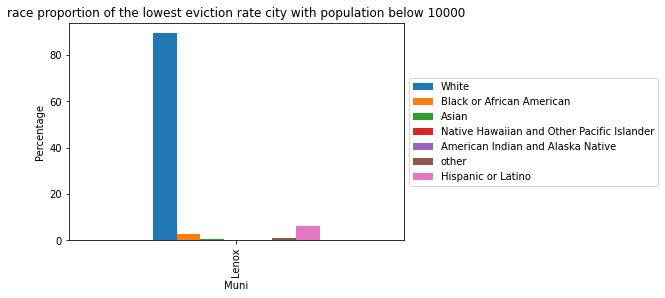

In [140]:
f = plt.figure()

plt.title('race proportion of the lowest eviction rate city with population below 10000', color='black')
lowest_rate1_race.plot( x='Muni',kind='bar', stacked=False, ax=f.gca())
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylabel("Percentage")
plt.show()

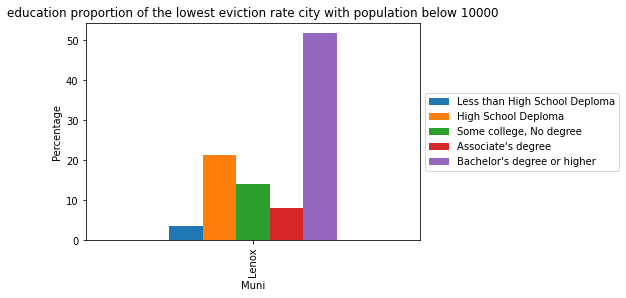

In [139]:
f = plt.figure()

plt.title('education proportion of the lowest eviction rate city with population below 10000', color='black')
lowest_rate1_education.plot( x='Muni',kind='bar', stacked=False, ax=f.gca())
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylabel("Percentage")
plt.show()

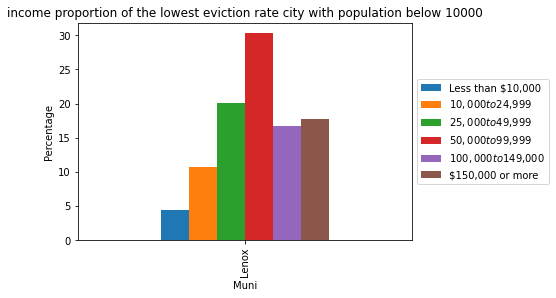

In [138]:
f = plt.figure()

plt.title('income proportion of the lowest eviction rate city with population below 10000', color='black')
lowest_rate1_income.plot( x='Muni',kind='bar', stacked=False, ax=f.gca())
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylabel("Percentage")
plt.show()

In [123]:
#ten_to_fifty_k
ten_to_fifty_k=ten_to_fifty_k[ten_to_fifty_k['Eviction Numbers']>5]
print(ten_to_fifty_k.shape)
lowest_rate2_race=ten_to_fifty_k[ten_to_fifty_k['Evictions per Rented Households']==ten_to_fifty_k['Evictions per Rented Households'].min()].filter(race_columns, axis=1)
print(lowest_rate2_race)
lowest_rate2_education=ten_to_fifty_k[ten_to_fifty_k['Evictions per Rented Households']==ten_to_fifty_k['Evictions per Rented Households'].min()].filter(edu_columns, axis=1)
print(lowest_rate2_education)
lowest_rate2_income=ten_to_fifty_k[ten_to_fifty_k['Evictions per Rented Households']==ten_to_fifty_k['Evictions per Rented Households'].min()].filter(income_columns, axis=1)
print(lowest_rate2_income)


(150, 496)
           Muni      White  Black or African American     Asian  \
237  Barnstable  84.342206                   5.636626  0.918795   

     Native Hawaiian and Other Pacific Islander  \
237                                    0.121605   

     American Indian and Alaska Native     other  Hispanic or Latino  
237                           0.274738  2.551457            5.936135  
           Muni  Less than High School Deploma  High School Deploma  \
237  Barnstable                            4.3                 26.6   

     Some college, No degree  Associate's degree  Bachelor's degree or higher  
237                     18.6                 9.9                         38.6  
           Muni  Less than $10,000  $10,000 to $24,999  $25,000 to $49,999  \
237  Barnstable                3.9                10.3                16.7   

     $50,000 to $99,999  $100,000 to $149,000  $150,000 or more  
237                33.3                  19.9              15.9  


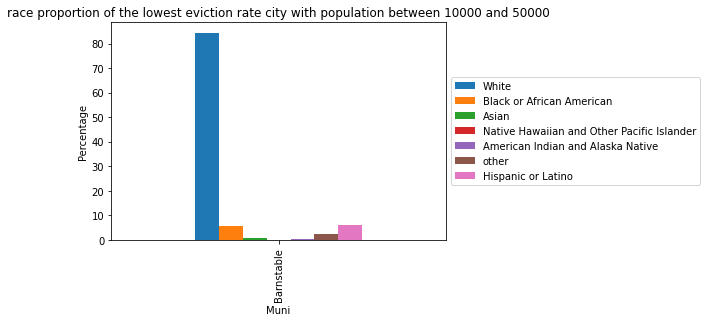

In [137]:
f = plt.figure()

plt.title('race proportion of the lowest eviction rate city with population between 10000 and 50000', color='black')
lowest_rate2_race.plot( x='Muni',kind='bar', stacked=False, ax=f.gca())
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylabel("Percentage")
plt.show()

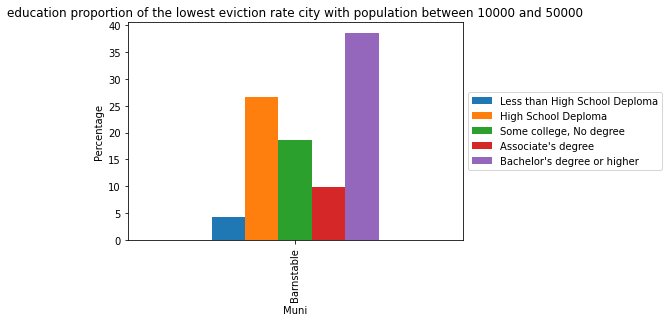

In [136]:
f = plt.figure()

plt.title('education proportion of the lowest eviction rate city with population between 10000 and 50000', color='black')
lowest_rate2_education.plot( x='Muni',kind='bar', stacked=False, ax=f.gca())
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylabel("Percentage")
plt.show()

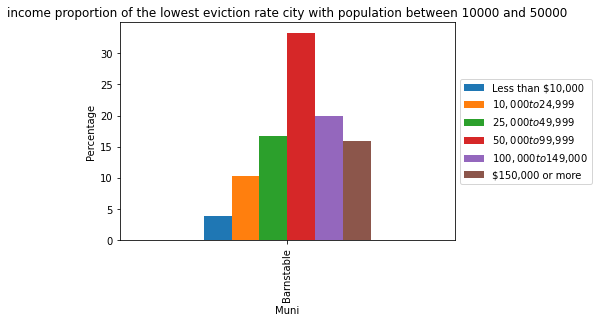

In [135]:
f = plt.figure()

plt.title('income proportion of the lowest eviction rate city with population between 10000 and 50000', color='black')
lowest_rate2_income.plot( x='Muni',kind='bar', stacked=False, ax=f.gca())
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylabel("Percentage")
plt.show()

In [125]:
#fifty_to_90_k
fifty_to_90_k=fifty_to_90_k[fifty_to_90_k['Eviction Numbers']>5]
print(fifty_to_90_k.shape)
lowest_rate3_race=fifty_to_90_k[fifty_to_90_k['Evictions per Rented Households']==fifty_to_90_k['Evictions per Rented Households'].min()].filter(race_columns, axis=1)
print(lowest_rate3_race)
lowest_rate3_education=fifty_to_90_k[fifty_to_90_k['Evictions per Rented Households']==fifty_to_90_k['Evictions per Rented Households'].min()].filter(edu_columns, axis=1)
print(lowest_rate3_education)
lowest_rate3_income=fifty_to_90_k[fifty_to_90_k['Evictions per Rented Households']==fifty_to_90_k['Evictions per Rented Households'].min()].filter(income_columns, axis=1)
print(lowest_rate3_income)

(17, 496)
       Muni     White  Black or African American      Asian  \
143  Newton  73.67625                   2.832052  14.844288   

     Native Hawaiian and Other Pacific Islander  \
143                                     0.00903   

     American Indian and Alaska Native     other  Hispanic or Latino  
143                           0.098202  3.347894            4.910094  
       Muni  Less than High School Deploma  High School Deploma  \
143  Newton                            1.1                  8.2   

     Some college, No degree  Associate's degree  Bachelor's degree or higher  
143                      6.9                 3.2                         79.2  
       Muni  Less than $10,000  $10,000 to $24,999  $25,000 to $49,999  \
143  Newton                2.7                 5.5                 8.5   

     $50,000 to $99,999  $100,000 to $149,000  $150,000 or more  
143                17.4                  15.3              50.6  


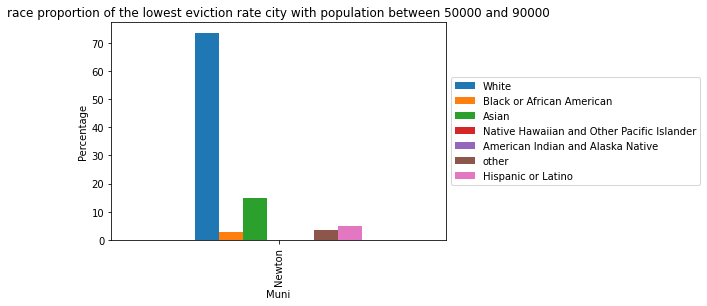

In [134]:
f = plt.figure()

plt.title('race proportion of the lowest eviction rate city with population between 50000 and 90000', color='black')
lowest_rate3_race.plot( x='Muni',kind='bar', stacked=False, ax=f.gca())
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylabel("Percentage")
plt.show()

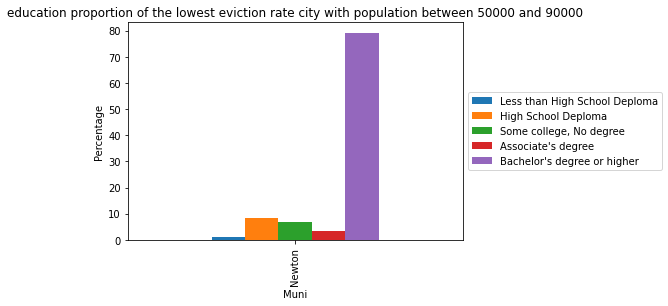

In [133]:
f = plt.figure()

plt.title('education proportion of the lowest eviction rate city with population between 50000 and 90000', color='black')
lowest_rate3_education.plot( x='Muni',kind='bar', stacked=False, ax=f.gca())
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylabel("Percentage")
plt.show()

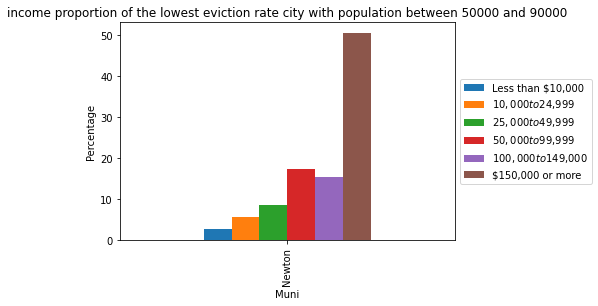

In [132]:
f = plt.figure()

plt.title('income proportion of the lowest eviction rate city with population between 50000 and 90000', color='black')
lowest_rate3_income.plot( x='Muni',kind='bar', stacked=False, ax=f.gca())
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylabel("Percentage")
plt.show()

In [127]:
#larger_than_90_k
larger_than_90_k=larger_than_90_k[larger_than_90_k['Eviction Numbers']>5]
print(larger_than_90_k.shape)
lowest_rate4_race=larger_than_90_k[larger_than_90_k['Evictions per Rented Households']==larger_than_90_k['Evictions per Rented Households'].min()].filter(race_columns, axis=1)
print(lowest_rate4_race)
lowest_rate4_education=larger_than_90_k[larger_than_90_k['Evictions per Rented Households']==larger_than_90_k['Evictions per Rented Households'].min()].filter(edu_columns, axis=1)
print(lowest_rate4_education)
lowest_rate4_income=larger_than_90_k[larger_than_90_k['Evictions per Rented Households']==larger_than_90_k['Evictions per Rented Households'].min()].filter(income_columns, axis=1)
print(lowest_rate4_income)

(9, 496)
     Muni      White  Black or African American     Asian  \
6  Boston  44.496397                  22.662297  9.587232   

   Native Hawaiian and Other Pacific Islander  \
6                                    0.053333   

   American Indian and Alaska Native     other  Hispanic or Latino  
6                           0.201058  2.892988           19.836523  
     Muni  Less than High School Deploma  High School Deploma  \
6  Boston                            5.6                 19.7   

   Some college, No degree  Associate's degree  Bachelor's degree or higher  
6                     13.1                 4.6                         49.7  
     Muni  Less than $10,000  $10,000 to $24,999  $25,000 to $49,999  \
6  Boston                9.9                14.3                14.7   

   $50,000 to $99,999  $100,000 to $149,000  $150,000 or more  
6                23.3                  15.7              22.2  


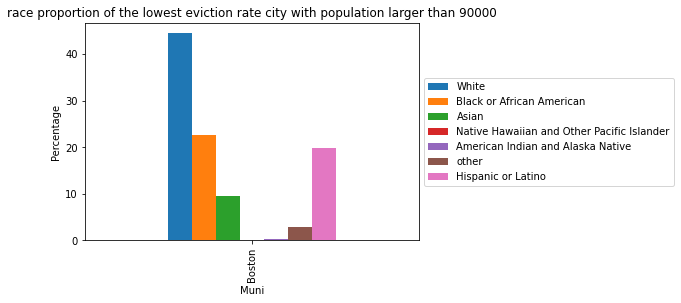

In [131]:
f = plt.figure()

plt.title('race proportion of the lowest eviction rate city with population larger than 90000', color='black')
lowest_rate4_race.plot( x='Muni',kind='bar', stacked=False, ax=f.gca())
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylabel("Percentage")
plt.show()

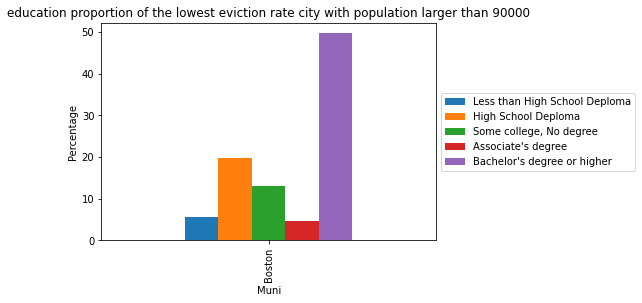

In [130]:
f = plt.figure()

plt.title('education proportion of the lowest eviction rate city with population larger than 90000', color='black')
lowest_rate4_education.plot( x='Muni',kind='bar', stacked=False, ax=f.gca())
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylabel("Percentage")
plt.show()

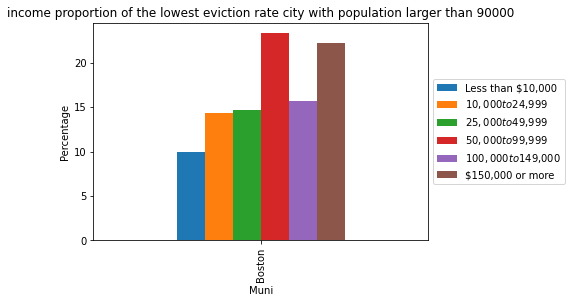

In [129]:
f = plt.figure()

plt.title('income proportion of the lowest eviction rate city with population larger than 90000', color='black')
lowest_rate4_income.plot( x='Muni',kind='bar', stacked=False, ax=f.gca())
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylabel("Percentage")
plt.show()